In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 99% 86.0M/86.8M [00:05<00:00, 23.8MB/s]
100% 86.8M/86.8M [00:05<00:00, 17.1MB/s]


In [ ]:
! unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
replace Testing/glioma_tumor/image(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("Training"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train.shape

(788, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=43)

In [ ]:
Y_train

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
       'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor',
      

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
20/20 [==============================] - 18s 182ms/step - loss: 28.7794 - accuracy: 0.3527 - val_loss: 1.3166 - val_accuracy: 0.3380
Epoch 2/20
20/20 [==============================] - 1s 74ms/step - loss: 1.2735 - accuracy: 0.4467 - val_loss: 1.2932 - val_accuracy: 0.3380
Epoch 3/20
20/20 [==============================] - 1s 74ms/step - loss: 1.1818 - accuracy: 0.4953 - val_loss: 1.1775 - val_accuracy: 0.5211
Epoch 4/20
20/20 [==============================] - 1s 74ms/step - loss: 1.0935 - accuracy: 0.5361 - val_loss: 1.1074 - val_accuracy: 0.5915
Epoch 5/20
20/20 [==============================] - 1s 74ms/step - loss: 1.0303 - accuracy: 0.5815 - val_loss: 1.1424 - val_accuracy: 0.4930
Epoch 6/20
20/20 [==============================] - 1s 75ms/step - loss: 0.9384 - accuracy: 0.5987 - val_loss: 1.0072 - val_accuracy: 0.5915
Epoch 7/20
20/20 [==============================] - 2s 78ms/step - loss: 0.8118 - accuracy: 0.6661 - val_loss: 0.9565 - val_accuracy: 0.5915
Epoch 8/20

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

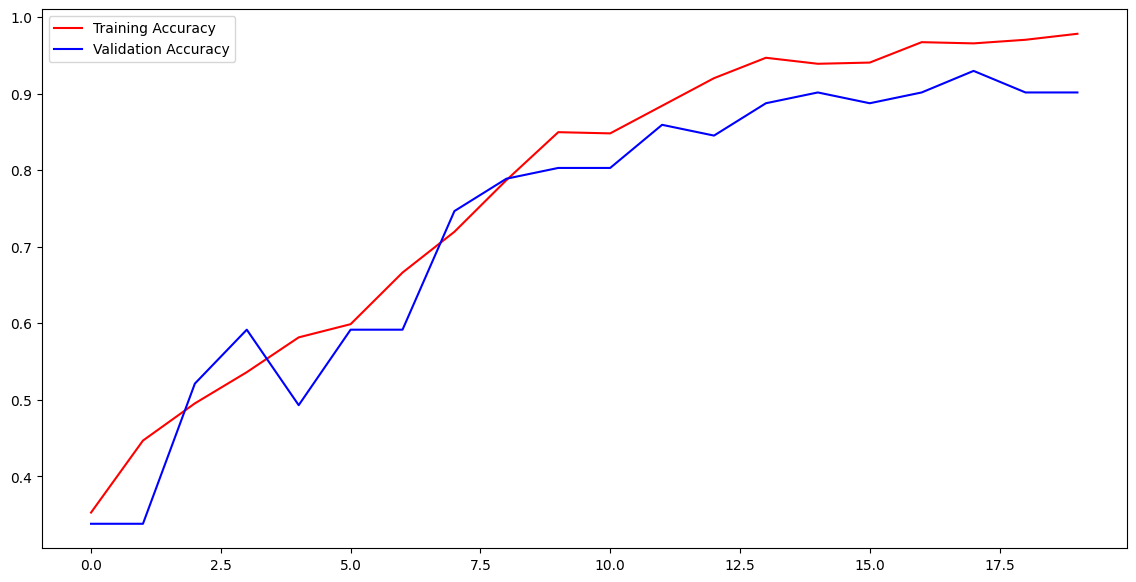

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/Testing/glioma_tumor/image(100).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 345ms/step
glioma_tumor


In [ ]:
Y_pred=model.predict(X_test)
Y_pred

In [ ]:
loss, acc = model.evaluate(x=X_test, y=y_test)

3/3 [==============================] - 0s 14ms/step - loss: 0.2020 - accuracy: 0.9367


In [ ]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [ ]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
model.save('path_to_your_model.h5')